<a href="https://colab.research.google.com/github/sh-shmss/from_scratch/blob/master/clustering_from_scratch_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.stats import norm
from scipy.stats import multivariate_normal
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
import matplotlib.cm as cm
from sklearn.datasets import make_spd_matrix
import matplotlib.animation as animation
from IPython.display import HTML

# Gaussian Mixtures


### Expectation-Maximization for 1-D Data

In [ ]:
n = 10
mu1, sigma1 = 9, 1 
mu2, sigma2 = 1, 1.6 
# mu3, sigma3 = 10, 0.5 
x1 = np.random.normal(mu1, np.sqrt(sigma1), n)
x2 = np.random.normal(mu2, np.sqrt(sigma2), n)
# x3 = np.random.normal(mu3, np.sqrt(sigma3), n)
X = np.array(list(x1) + list(x2))

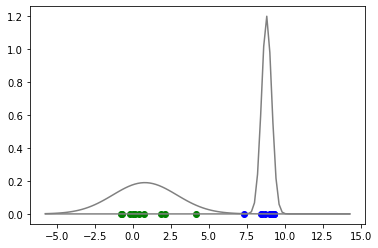

In [ ]:
k = 2
mu = [X[np.random.randint(len(X))] for i in range(k)]
sigma = np.random.random_sample(k)
phi = [1/k for i in range(k)]

eps = 1e-7

for iter in range(6):
  
  numerator = [np.zeros(1) for i in range(k)]
  for j in range(k):
    numerator[j] = norm.pdf(X, mu[j], np.sqrt(sigma[j]))

  likelihood = [np.zeros(1) for i in range(k)]
  for j in range(k):
    likelihood[j] = numerator[j] * phi[j] / (np.sum([numerator[i] * phi[i] for i in range(k)], axis=0) + eps)

    mu[j] = np.sum(likelihood[j] * X) / np.sum(likelihood[j] + eps)
    sigma[j] = np.sum(likelihood[j] * np.square(X - mu[j])) / np.sum(likelihood[j] + eps)

    phi[j] = np.mean(likelihood[j])


xspace = np.linspace(np.min(X)-5, np.max(X)+5, 100) 
colors=['blue', 'green']
start = 0

for i in range(k):
  plt.plot(xspace, norm.pdf(xspace, mu[i], sigma[i]), c="gray")
  plt.scatter(X[start:start+n], np.zeros(n), c=colors[i])
  start += n
plt.show()

### Expectation-Maximization for 2-D Data

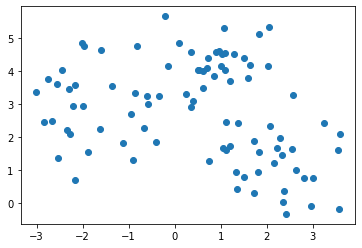

In [ ]:
n = 90
x,y = make_blobs(n_samples=n, centers=3, n_features=2, random_state=0, cluster_std=(0.7,0.8,1))
x1 = x[y==0]
x2 = x[y==1]
x3 = x[y==2]
X = np.concatenate((x1, x2, x3), axis=0)

plt.scatter(X[:,0], X[:,1])
plt.show()

In [ ]:
n_iter = 50
k = 3

mus = []
sigmas = []

mu = [X[np.random.randint(len(X))] for i in range(k)]
sigma = []
for i in range(k):
  sigma.append(make_spd_matrix(X.shape[1]))
sigma = np.array(sigma)
phi = [1/k for i in range(k)]
eps = 1e-7

for iter in range(n_iter):
  
  numerator = []
  for j in range(k):
    mus.append(mu[j])
    sigmas.append(sigma[j])
    numerator.append(multivariate_normal.pdf(x=X, mean=mu[j], cov=sigma[j]))
  numerator = np.array(numerator)
  assert numerator.shape == (k, len(X))

  likelihood = []
  for j in range(k):
    likelihood.append(numerator[j] * phi[j] / (np.sum([numerator[i] * phi[i] for i in range(k)], axis=0) + eps))

    mu[j] = np.sum(likelihood[j].reshape(len(X),1) * X, axis=0) / np.sum(likelihood[j] + eps)
    sigma[j] = np.dot(likelihood[j].reshape(1,len(X)) * (X - mu[j]).T, (X - mu[j])) / np.sum(likelihood[j] + eps)

    phi[j] = np.mean(likelihood[j])

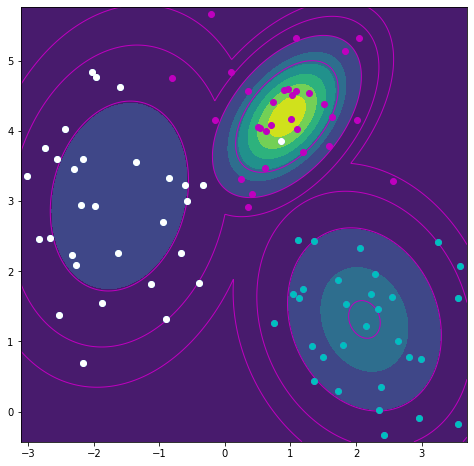

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
mins = X.min(axis=0) - 0.1
maxs = X.max(axis=0) + 0.1
xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 1000),
                      np.linspace(mins[1], maxs[1], 1000))
X_new = np.c_[xx.ravel(), yy.ravel()]
y_likelihood = []
for j in range(k):
  y_likelihood.append(multivariate_normal.pdf(x=X_new, mean=mu[j], cov=sigma[j]))
y_likelihood = np.array(y_likelihood)
y_predict = np.max(y_likelihood, axis=0)
zz = y_predict.reshape(xx.shape)

colors=['mo','co','wo']
start = 0
m = len(x1)
for i in range(k):
    ax.plot(X[start:n,0], X[start:n,1], colors[i])
    start += m

ax.contourf(xx, yy, zz)
ax.contour(xx, yy, zz,
          levels=np.logspace(-2, 2, 10),
          linewidths=1, colors='m')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
mins = X.min(axis=0) - 0.1
maxs = X.max(axis=0) + 0.1
xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 1000),
                      np.linspace(mins[1], maxs[1], 1000))
X_new = np.c_[xx.ravel(), yy.ravel()]
y_likelihood = []
for j in range(k):
  y_likelihood.append(multivariate_normal.pdf(x=X_new, mean=mu[j], cov=sigma[j]))
y_likelihood = np.array(y_likelihood)
y_predict = np.max(y_likelihood, axis=0)
zz = y_predict.reshape(xx.shape)

colors=['mo','co','wo']
start = 0
m = len(x1)
for i in range(k):
    plt.plot(X[start:n,0], X[start:n,1], colors[i])
    start += m
ax.contourf(xx, yy, zz)
ax.contour(xx, yy, zz,
          levels=np.logspace(-2, 2, 10),
          linewidths=1, colors='m')

mus = np.array(mus)
sigmas = np.array(sigmas)
mus = np.split(mus,n_iter)
sigmas = np.split(sigmas,n_iter)

def animate(i):
    mu = mus[i]
    sigma = sigmas[i]

    y_likelihood = []
    for j in range(k):
      y_likelihood.append(multivariate_normal.pdf(x=X_new, mean=mu[j], cov=sigma[j]))
    y_likelihood = np.array(y_likelihood)
    y_predict = np.max(y_likelihood, axis=0)
    zz = y_predict.reshape(xx.shape)

    ax.contourf(xx, yy, zz)

ani = animation.FuncAnimation(
    fig, animate, interval=120, save_count=50)

plt.close()
HTML(ani.to_jshtml())

In [ ]:
HTML(ani.to_html5_video())